In [1]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt
import string
from string import punctuation

In [2]:
RESULTS = '../results/qbench2'

In [3]:
gpt = json.load(open(f'{RESULTS}/gpt.json'))

In [4]:
gemini = json.load(open(f'{RESULTS}/gemini.json'))

In [5]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/llava.jsonl'), "r")]

In [36]:
vila = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/vila.jsonl'), "r")]

In [9]:
gpt[190]

{'image': 'q-bench2/llvisionqa_compare_dev/1142.JPG_cat_5666479112.jpg.jpg',
 'question': 'Which color looks brighter? Options: The green of the circuit board in the first image, The green of the leaves in the second image, The grey of the iron table in the first image, The color on the cat in the second image. Please only return one of the options without any other words or punctuation.',
 'answer': 'The green of the circuit board in the first image',
 'option': ['The green of the circuit board in the first image',
  'The green of the leaves in the second image',
  'The grey of the iron table in the first image',
  'The color on the cat in the second image'],
 'gpt_answer': 'The green of the leaves in the second image'}

# GPT

In [6]:
def cal_acc(key, data):
    correct = []
    wrong = []
    invalid = []
    error = []
    c = 0
    for i in data:
        c += 1
        if isinstance(i[key], dict):
            error.append(i)
            continue
        pred = i[key].lstrip(' ').rstrip(' ').lower().strip(punctuation)
        gt = i['answer'].lstrip(' ').rstrip(' ').lower().strip(punctuation)
        options = [j.lstrip(' ').rstrip(' ').lower() for j in i['option']] + ['none']

        if 'error' in pred:
            error.append(i)
        elif pred not in options:
            invalid.append(i)
        else:
            if pred == gt:
                correct.append(i)
            else:
                wrong.append(i)
    return correct, wrong, invalid, error, c

In [7]:
correct, wrong, invalid, error, c = cal_acc('gpt_answer', gpt)

In [54]:
# error = []
# correct_pred = []
# wrong_pred = []
# gt = []
# correct = []
# wrong = []

# for pair in gpt:
#     gt.append(pair['answer'])
#     # if pair['gpt_answer'] not in ('Left', "Right"):
#     #     # print(pair)
#     #     error.append(pair)
#     #     continue
#     if pair['answer'] == pair['gpt_answer']:
#             correct.append(pair)
#             correct_pred.append(pair['gpt_answer'])
#     elif pair['answer'] != pair['gpt_answer']:
#             wrong.append(pair)
#             wrong_pred.append(pair['gpt_answer'])
#     else:
#         print('fuck')

In [9]:
len(correct) / (len(correct) + len(wrong))

0.7324649298597194

In [12]:
len(correct) + len(wrong) + len(error) + len(invalid)

1000

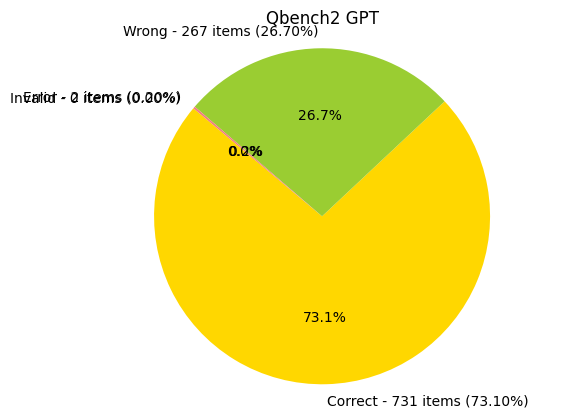

In [11]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'pink']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Qbench2 GPT')
plt.show()

# Gemini

In [13]:
error = []
refine = []
rerun = []
for pair in gemini:
    new = deepcopy(pair)

    # Remove space, punctuation from prediction 
    pred = new['gemini_answer']
    pred = pred.strip()
    pred = pred.translate(str.maketrans('','',string.punctuation))
    new['gemini_answer'] = pred
    
    refine.append(new)
    
        

In [14]:

correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gemini_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gemini_answer']:
            correct.append(pair)
            correct_pred.append(pair['gemini_answer'])
    elif 'Error' in pair['gemini_answer']:
            error.append(pair)
    elif pair['answer'] != pair['gemini_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gemini_answer'])

    else:
        print('fuck')



In [15]:
len(correct) / (len(correct) + len(wrong))

0.5935613682092555

In [16]:
correct, wrong, invalid, error, c = cal_acc('gemini_answer', gemini)

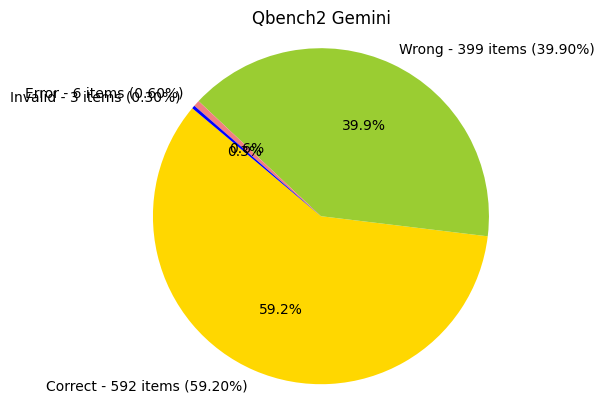

In [17]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Qbench2 Gemini')
plt.show()

# LLaVA-1.6

In [40]:
correct, wrong, invalid, error, c = cal_acc('llava_answer', llava)

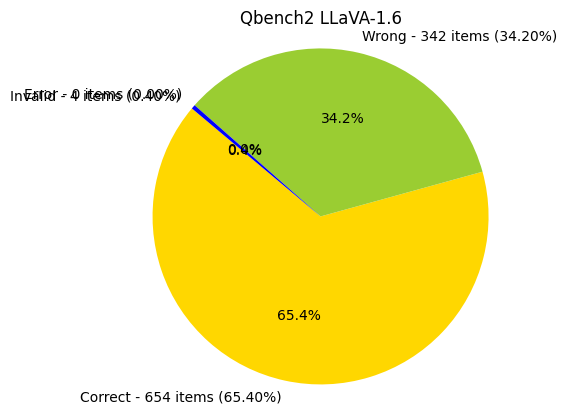

In [42]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Qbench2 LLaVA-1.6')
plt.show()

# Vila1.5

In [43]:
correct, wrong, invalid, error, c = cal_acc('vila_answer', vila)

In [44]:
len(correct) / (len(correct) + len(wrong))

0.6596596596596597

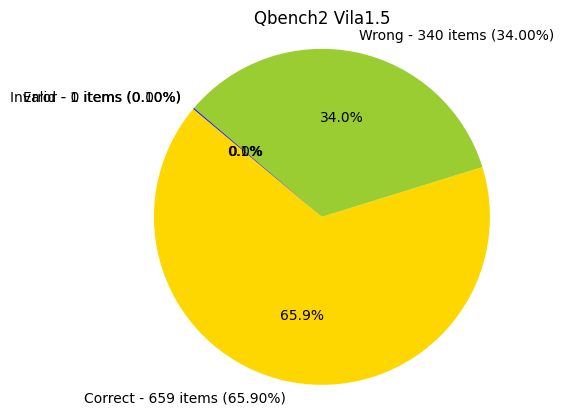

In [45]:
sizes = [len(correct), len(wrong), len(error), len(invalid)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
          f'Invalid - {sizes[3]} items ({sizes[3]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Qbench2 Vila1.5')
plt.show()